> # **GRADUATION ADMISSION PREDICTION USING ANN**
> 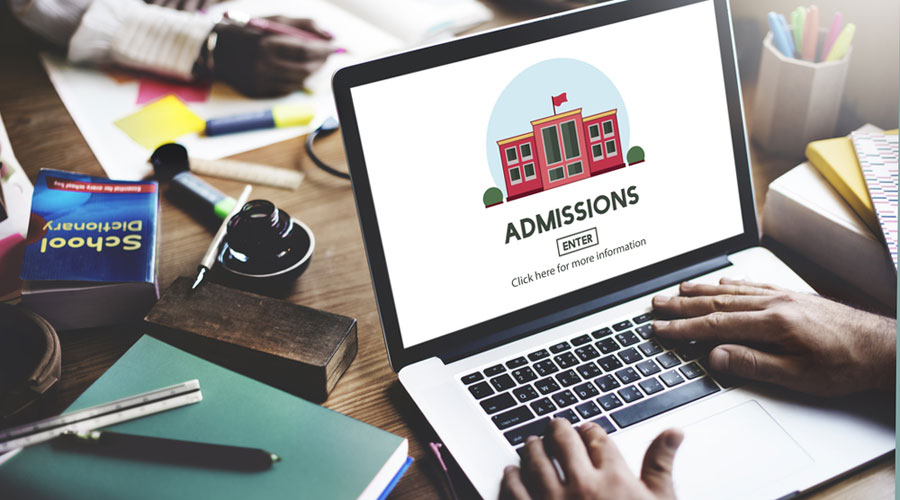

> ### DATASET OVERVIEW
> - `GRE Score`: This represents the applicant’s score in the Graduate Record Examination (GRE).
> - `TOEFL Score`: The Test of English as a Foreign Language (TOEFL) score reflects an applicant’s proficiency in English.
> - `University Rating`: This feature indicates the rating or prestige of the university where the applicant completed their undergraduate studies.
> - `Statement of Purpose (SOP)`: The SOP is a written essay submitted by the applicant. It outlines their academic and professional goals, research interests, and reasons for pursuing graduate studies. Admissions committees evaluate the quality and alignment of the SOP with the program.
> - `Letter of Recommendation (LOR)`: LORs are written by professors, employers, or other individuals who can vouch for the applicant’s abilities and character.
> - `CGPA (Cumulative Grade Point Average)`: CGPA reflects the applicant’s overall academic performance during their undergraduate studies.
> - `Research Experience (Research)`: This binary feature indicates whether the applicant has research experience.
> - `Chance of Admit`: This is the target variable—the output we’re trying to predict. It represents the probability of an applicant being admitted, ranging from 0 (low chance) to 1 (high chance).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop('Serial No.', axis = 1, inplace = True)

<hr>

> ### ARTIFICIAL NEURAL NETWORK (ANN) ARCHITECTURE
> - `Input Layer`: It has 7 units (neurons), which corresponds to the number of features in your dataset (since input_dim = 7). The activation function used here is the Rectified Linear Unit (ReLU), which introduces non-linearity to the model.
> - `Hidden Layer`: This layer has 7 units (neurons) and uses ReLU activation. Hidden layers allow the network to learn complex representations from the input data.
> - `Output Layer`: It has a single unit (since you’re predicting a continuous value, i.e., the “Chance of Admit”). The activation function is linear, which means the output is directly proportional to the weighted sum of inputs (no non-linearity).

In [4]:
model = Sequential()

model.add(Dense(units = 7, activation = 'relu', input_dim = 7))
model.add(Dense(units = 7, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer = 'Adam',
    loss = 'mean_squared_error',
    metrics = ['r2_score']
)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
history = model.fit(X_train_scaled, y_train, epochs = 500, validation_split = 0.2, verbose = 0)

In [8]:
model.predict(X_test_scaled)[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.9149226 ],
       [0.80264217],
       [0.5740785 ],
       [0.71136945],
       [0.816775  ]], dtype=float32)

In [9]:
r2_score(y_test, model.predict(X_test_scaled))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8236905159276857

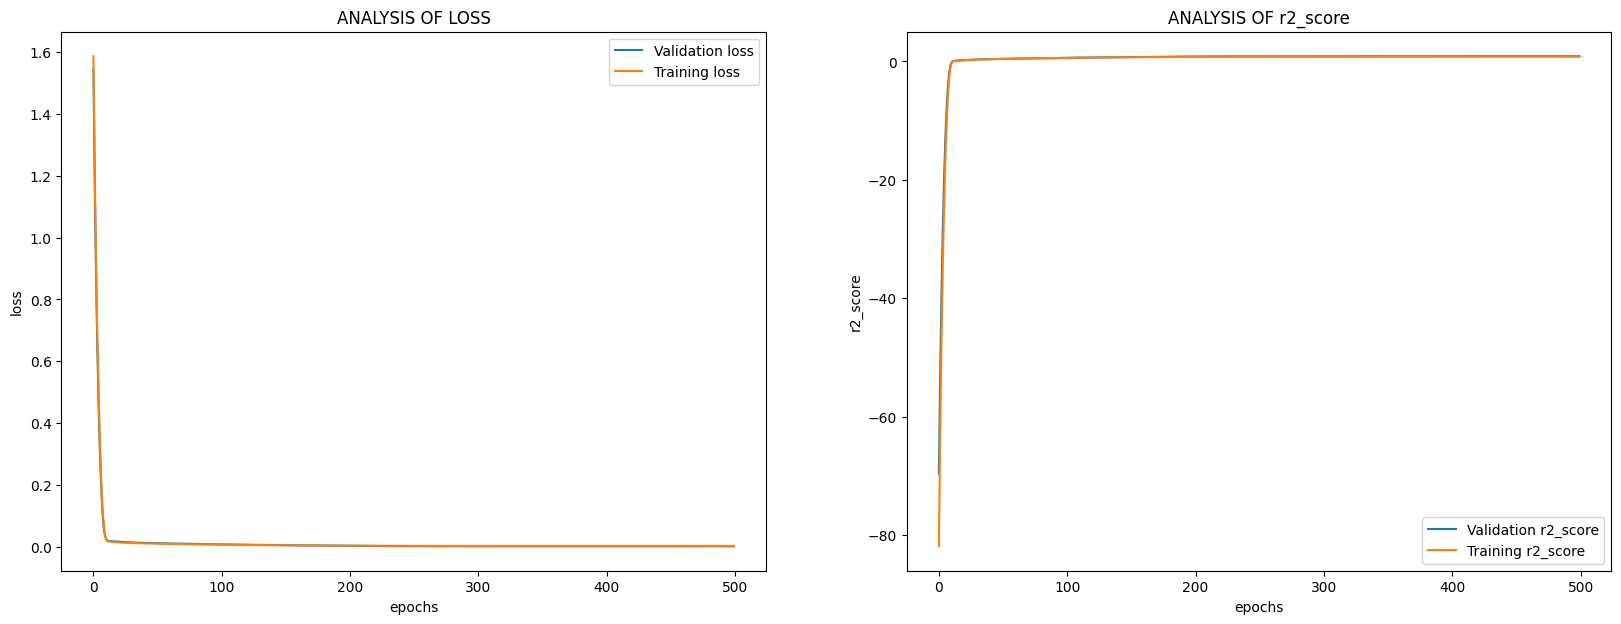

In [10]:
fig, ax = plt.subplots(nrows=1, ncols = 2)

fig.set_figwidth(20)
fig.set_figheight(7)

ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('ANALYSIS OF LOSS')

ax[1].plot(history.history['val_r2_score'], label = 'Validation r2_score')
ax[1].plot(history.history['r2_score'], label = 'Training r2_score')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('r2_score')
ax[1].set_title('ANALYSIS OF r2_score')

fig.show()